In [2]:
from pandas import  *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [3]:
df=read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
x=df.iloc[: , 0:8]
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [5]:
y=df['Outcome']

In [6]:
names=x.columns

In [7]:
rng=range(len(names))

In [8]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.3)

In [9]:
ls.fit(x,y)

Lasso(alpha=0.3)

In [10]:
ls.coef_

array([ 0.00000000e+00,  6.07984764e-03, -4.26871361e-04,  0.00000000e+00,
       -8.17882506e-05,  7.78847221e-03,  0.00000000e+00,  3.08440209e-03])

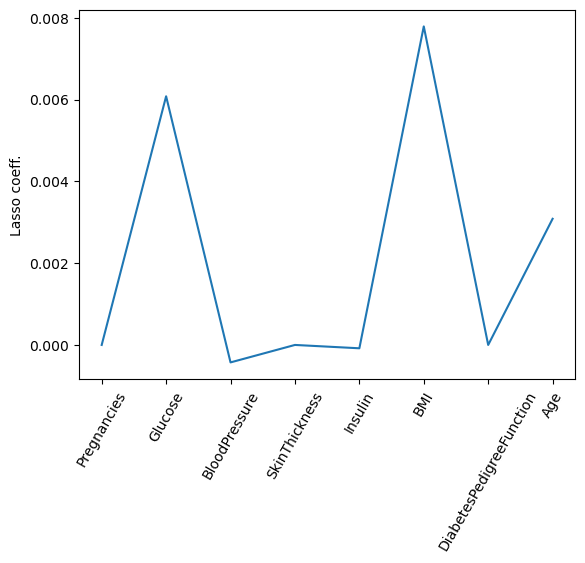

In [11]:
plot(rng,ls.coef_)
xticks(rng,names,rotation=60)
ylabel('Lasso coeff.')
show()

In [12]:
from sklearn.linear_model import ElasticNet
e=ElasticNet(l1_ratio=0.2)

In [13]:
e.fit(x,y)

ElasticNet(l1_ratio=0.2)

In [14]:
e.coef_

array([ 0.        ,  0.00605912, -0.00102856,  0.        , -0.00010064,
        0.00971494,  0.        ,  0.00398278])

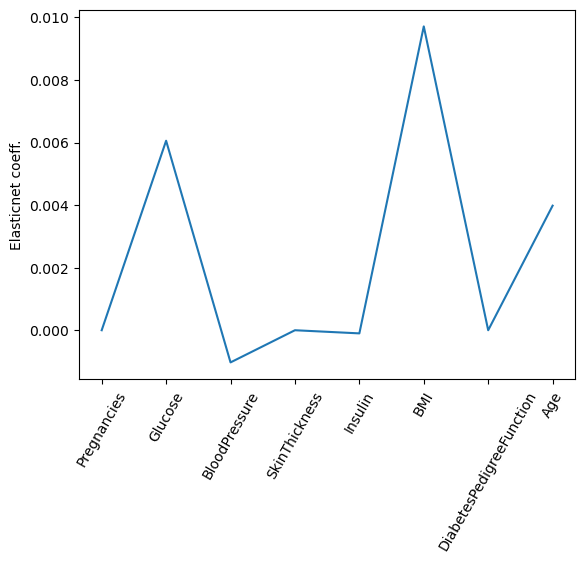

In [15]:
plot(rng,e.coef_)
xticks(rng,names,rotation=60)
ylabel('Elasticnet coeff.')
show()

NOW, WE CAN TRAIN X BY 2 MOST DETERMINING FACTORS AND Y TO PREDICT OUTCOME

In [16]:
x=df[['Glucose']]  #take BMI or GLUCOSE 

In [17]:
y=df['Outcome']

In [18]:
r=LinearRegression()
r.fit(x,y)
r.score(x,y)

0.21769820124599804

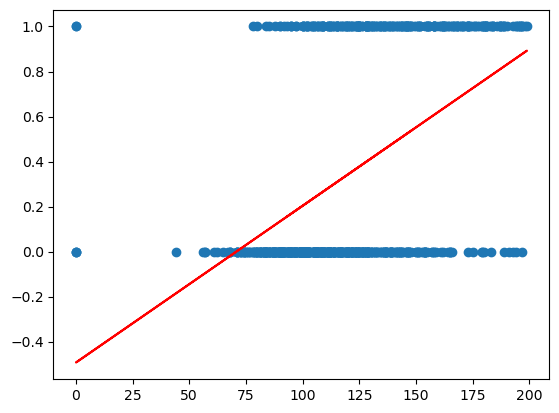

In [19]:
scatter(x,y)
plot(x,r.predict(x),color='red')

In [20]:
r.predict([[150]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.55153897])

In [21]:
from sklearn.preprocessing import PolynomialFeatures
r2=PolynomialFeatures(degree=14)# degree=2 is best for lower milage(calculated)
x2=r2.fit_transform(x)     #degree 5 is best gor higher milage

In [22]:
l=LinearRegression()
l.fit(x2,y)
l.score(x2,y)

0.24589972924733028

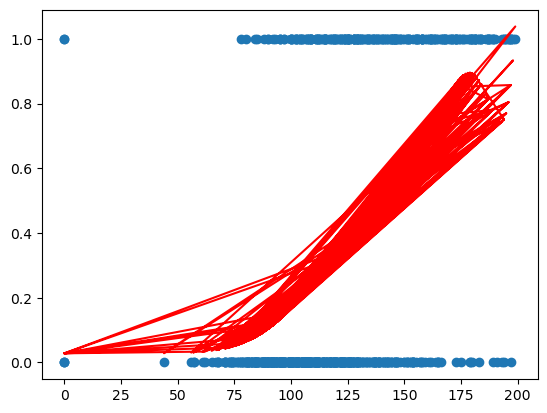

In [23]:
scatter(x,y)
plot(x,l.predict(r2.fit_transform(x)),color='red')

In [24]:
l.predict(r2.fit_transform([[150]]))

array([0.54921382])

In [25]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [26]:
x=df[['Glucose','BMI']]
y=df['Outcome']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1160)

In [28]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(x_train,y_train)

LogisticRegression()

In [29]:
l.score(x_train,y_train)

0.737785016286645

In [30]:
l.score(x_test,y_test)

0.8636363636363636

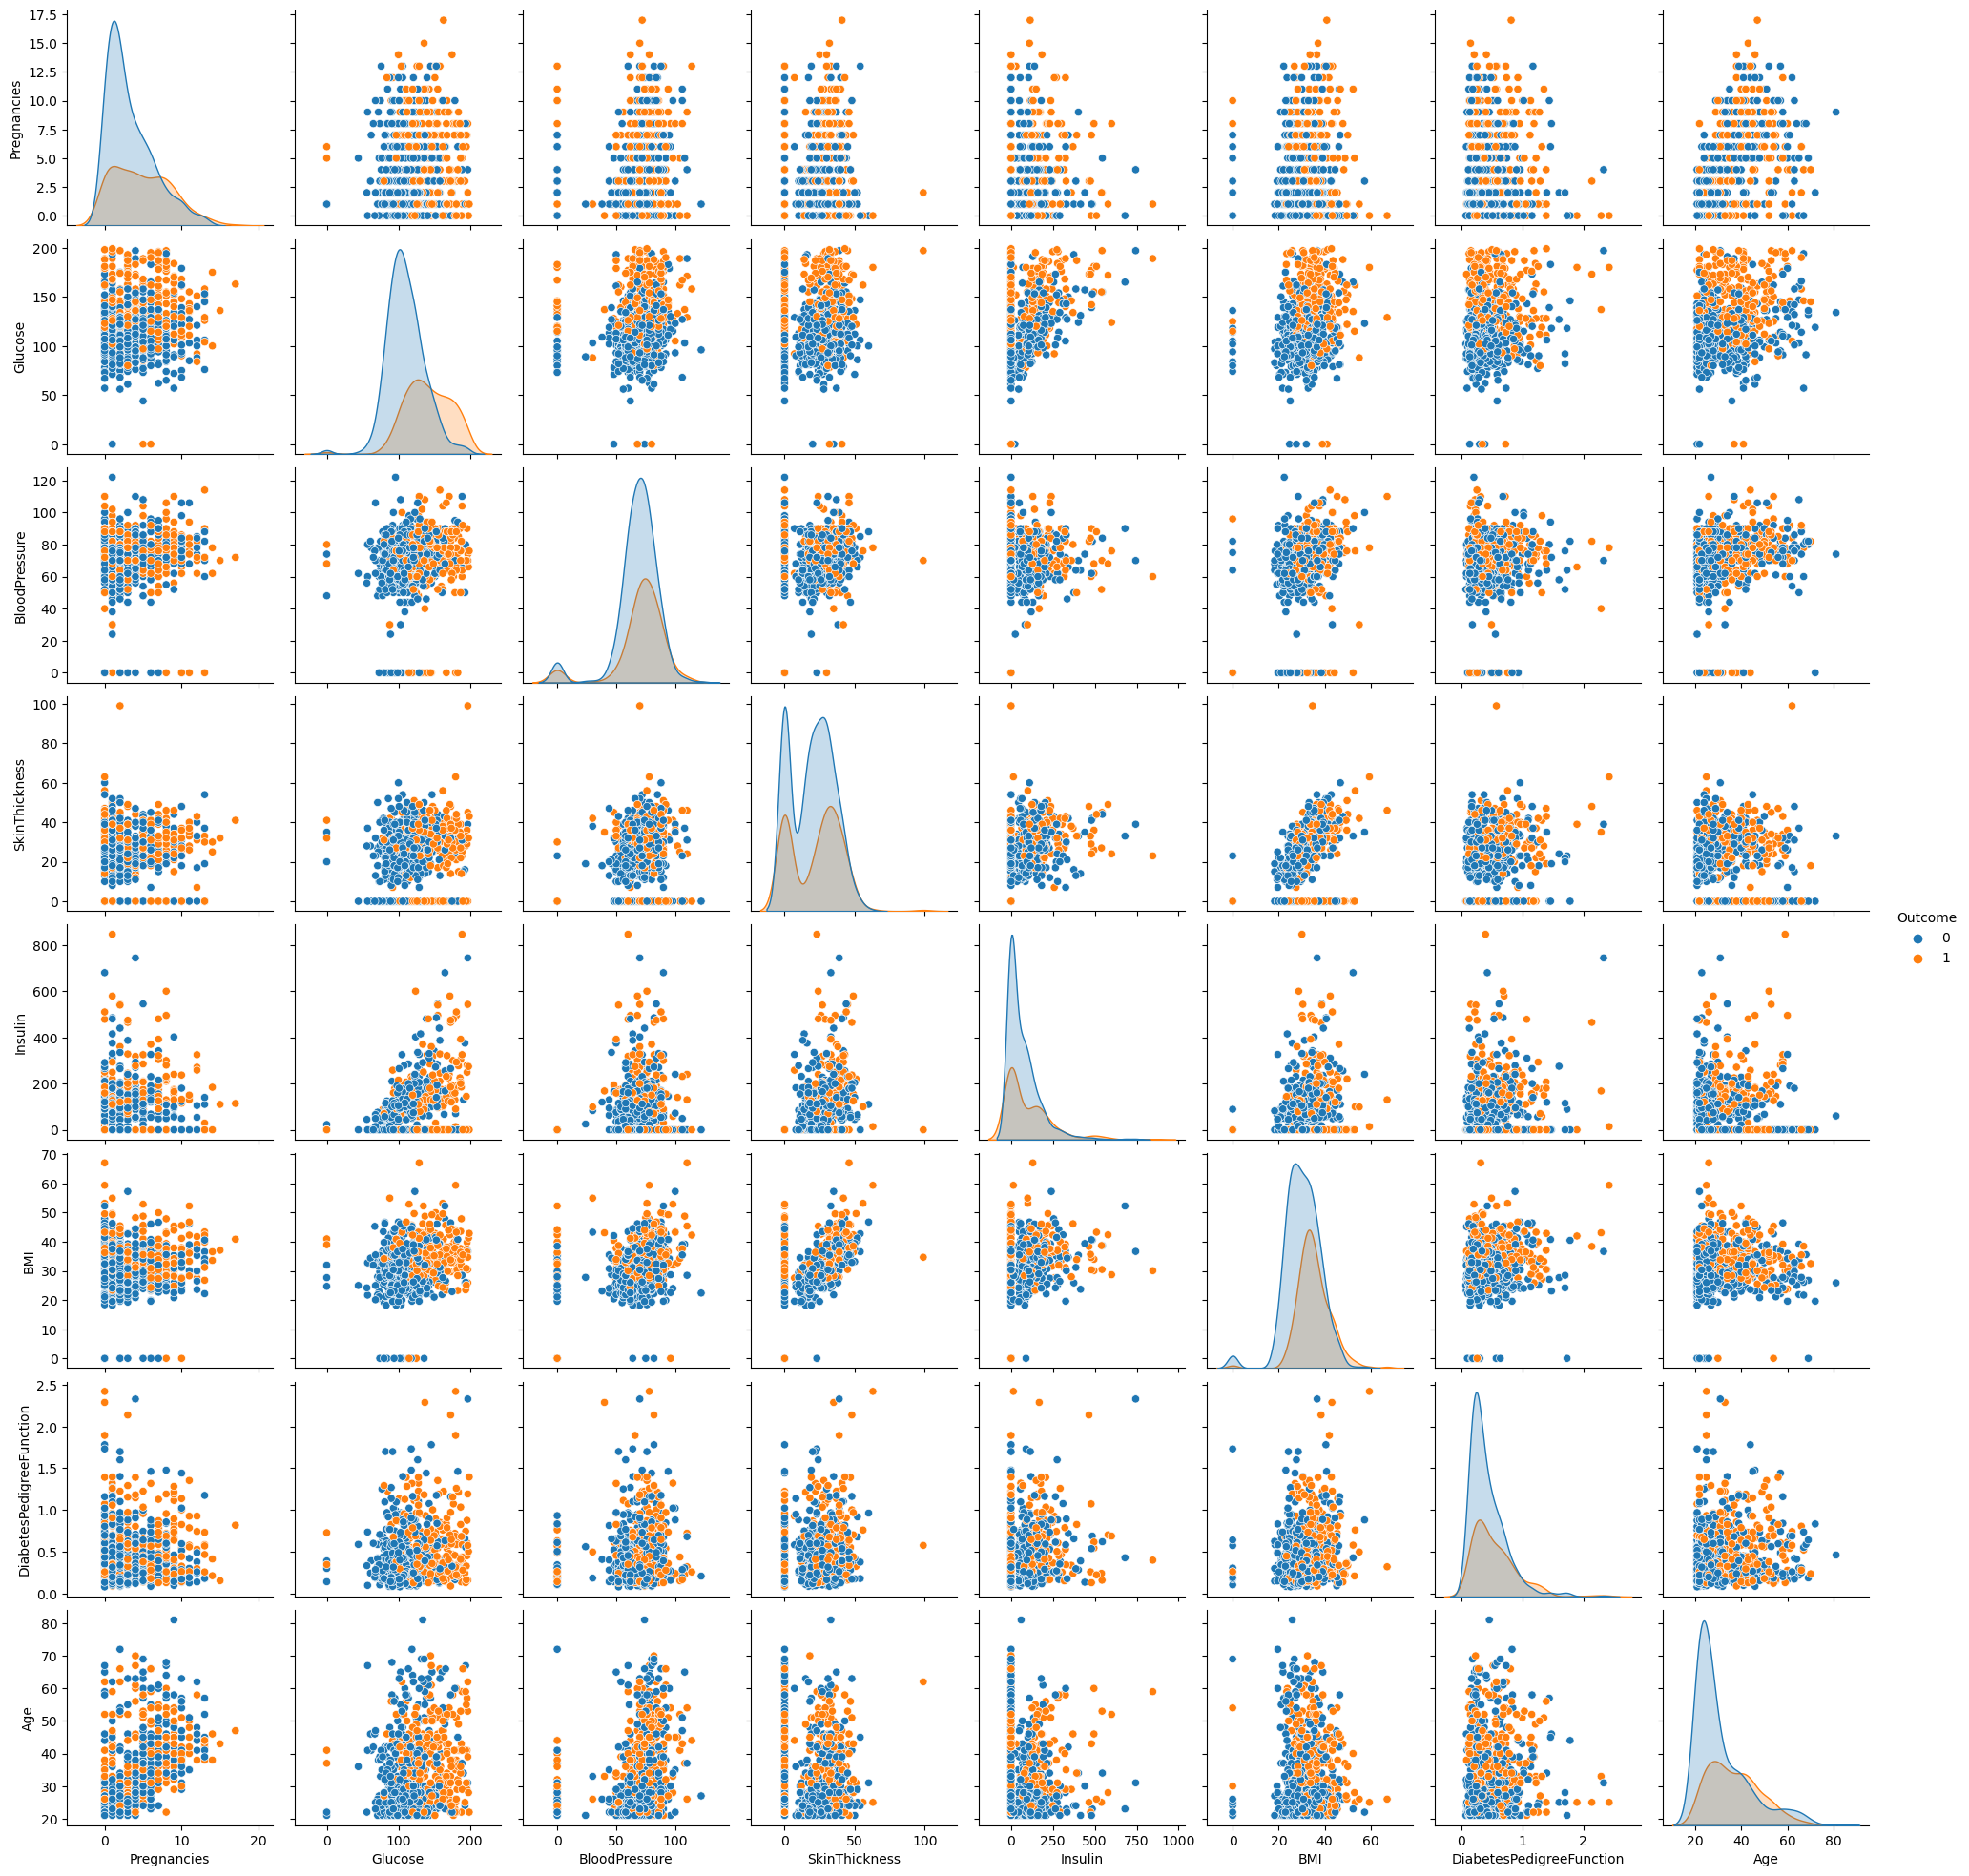

In [53]:
pairplot(hue='Outcome',data=df)

Text(0, 0.5, 'Diabetic ? ')

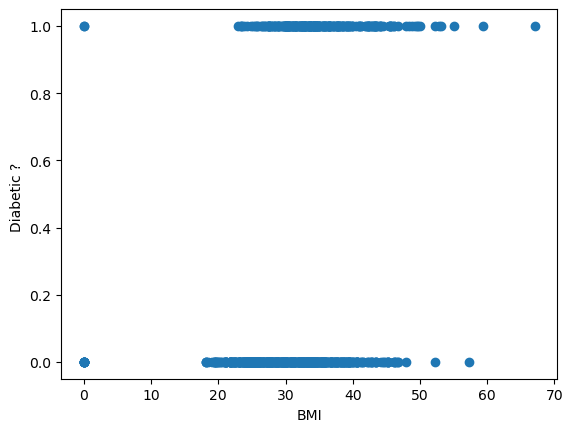

In [32]:
scatter(df['BMI'], df['Outcome'])
xlabel('BMI')
ylabel('Diabetic ? ')

Text(0, 0.5, 'Diabetic ? ')

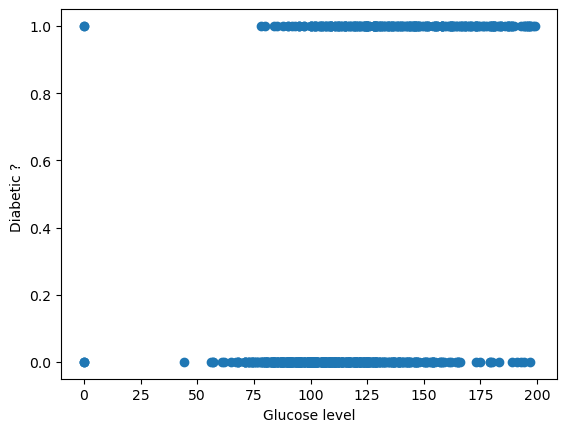

In [33]:
scatter(df['Glucose'], df['Outcome'])
xlabel('Glucose level')
ylabel('Diabetic ? ')

Text(0, 0.5, 'Outcome')

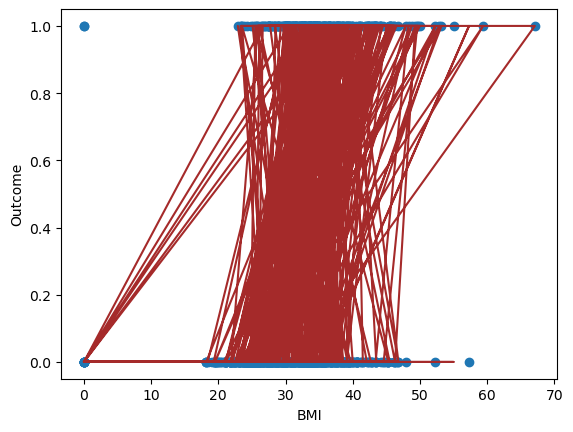

In [34]:
plot(df['BMI'], l.predict(df[['Glucose', 'BMI']]), color='brown')
scatter(df['BMI'], df['Outcome'])
xlabel('BMI')
ylabel('Outcome')


Text(0, 0.5, 'Diabetic ?')

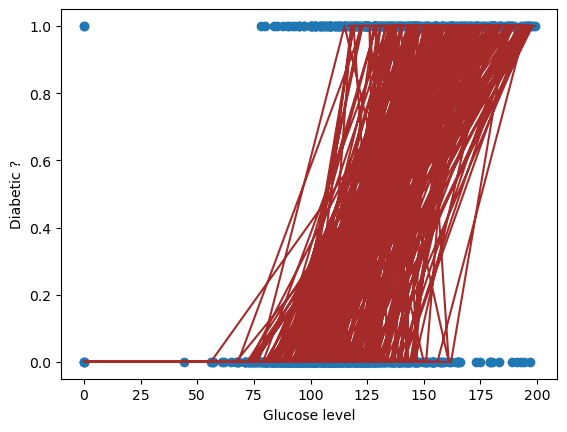

In [35]:
plot(df['Glucose'], l.predict(df[['Glucose', 'BMI']]), color='brown')
scatter(df['Glucose'], df['Outcome'])
xlabel('Glucose level')
ylabel('Diabetic ?')

In [36]:
l.predict([[135,40]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [37]:
l.predict([[135,30]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

TEST CASES TAKEN FROM KNN CLASSIFIER(ch- 29)(pg-590)

In [38]:
l.predict([[189,30]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [39]:
l.predict([[126,39.3]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1160)

In [41]:
l=LogisticRegression()
l.fit(x_train,y_train)

LogisticRegression()

In [42]:
l.score(x_train,y_train)

0.737785016286645

In [43]:
l.score(x_test,y_test)

0.8636363636363636

In [44]:
from sklearn.svm import SVC

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=82)

In [46]:
s=SVC()
s.fit(x_train,y_train)

SVC()

In [47]:
s.score(x_train,y_train)

0.739413680781759

In [48]:
s.score(x_test,y_test)

0.8376623376623377

In [49]:
###
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Assuming 'x' and 'y' are defined with your dataset

max_train_accuracy = 0.0  # Initialize maximum training accuracy
best_train_random_state = 0  # Initialize variable to store the random state of the best training accuracy
max_test_accuracy = 0.0  # Initialize maximum testing accuracy
best_test_random_state = 0  # Initialize variable to store the random state of the best testing accuracy

for i in range(417, 1200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    l=LogisticRegression()
    l.fit(x_train,y_train)  # Train the model
    train_score = l.score(x_train, y_train)  # Calculate accuracy on the training set
    test_score = l.score(x_test, y_test)  # Calculate accuracy on the test set
    
    # Check for the maximum training accuracy
    if train_score > max_train_accuracy:
        max_train_accuracy = train_score
        best_train_random_state = i

    # Check for the maximum testing accuracy
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        best_test_random_state = i

print(f"The maximum training accuracy within the range of random states is: {max_train_accuracy} achieved with random state: {best_train_random_state}")
print(f"The maximum testing accuracy within the range of random states is: {max_test_accuracy} achieved with random state: {best_test_random_state}")


The maximum training accuracy within the range of random states is: 0.7915309446254072 achieved with random state: 635
The maximum testing accuracy within the range of random states is: 0.8636363636363636 achieved with random state: 1160


In [50]:
###
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming 'x' and 'y' are defined with your dataset

max_train_accuracy = 0.0  # Initialize maximum training accuracy
best_train_random_state = 0  # Initialize variable to store the random state of the best training accuracy
max_test_accuracy = 0.0  # Initialize maximum testing accuracy
best_test_random_state = 0  # Initialize variable to store the random state of the best testing accuracy

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    r=SVC(kernel='linear')
    r.fit(x_train,y_train)  # Train the model
    train_score = r.score(x_train, y_train)  # Calculate accuracy on the training set
    test_score = r.score(x_test, y_test)  # Calculate accuracy on the test set
    
    # Check for the maximum training accuracy
    if train_score > max_train_accuracy:
        max_train_accuracy = train_score
        best_train_random_state = i

    # Check for the maximum testing accuracy
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        best_test_random_state = i

print(f"The maximum training accuracy within the range of random states is: {max_train_accuracy} achieved with random state: {best_train_random_state}")
print(f"The maximum testing accuracy within the range of random states is: {max_test_accuracy} achieved with random state: {best_test_random_state}")


The maximum training accuracy within the range of random states is: 0.7785016286644951 achieved with random state: 3
The maximum testing accuracy within the range of random states is: 0.8376623376623377 achieved with random state: 82
